In [1]:
import sys
sys.path.append("../")
sys.path.append("../../../assets")

# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import bayesflow as beef
import pandas as pd

from experiments import NonStationaryDDMExperiment
from models import RandomWalkDDM, MixtureRandomWalkDDM, LevyFlightDDM, RegimeSwitchingDDM

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gpu setting and checking
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Constants

In [3]:
TRAIN_RANDOM_WALK_DDM = False
TRAIN_MIXTURE_RANDOM_WALK_DDM = False
TRAIN_LEVY_FLIGHT_DDM = False
TRAIN_REGIME_SWITCHING_DDM = False

In [4]:
random_walk_model = RandomWalkDDM()
random_walk_experiment = NonStationaryDDMExperiment(
    random_walk_model,
    summary_network_type="smoothing",
    checkpoint_path="../checkpoints/smoothing_random_walk_ddm"
    )
mixture_random_walk_model = MixtureRandomWalkDDM()
mixture_random_walk_experiment = NonStationaryDDMExperiment(
    mixture_random_walk_model,
    summary_network_type="smoothing",
    checkpoint_path="../checkpoints/smoothing_mixture_random_walk_ddm"
    )
levy_flight_model = LevyFlightDDM()
levy_flight_experiment = NonStationaryDDMExperiment(
    levy_flight_model,
    summary_network_type="smoothing",
    checkpoint_path="../checkpoints/smoothing_levy_flight_ddm"
    )

regime_switching_model = RegimeSwitchingDDM()
regime_switching_experiment = NonStationaryDDMExperiment(
    regime_switching_model,
    summary_network_type="smoothing",
    checkpoint_path="../checkpoints/smoothing_regime_switching_ddm"
    )

INFO:root:Performing 2 pilot runs with the random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 3)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.
INFO:root:Loaded loss history from ../checkpoints/smoothing_random_walk_ddm/history_75.pkl.
INFO:root:Networks loaded from ../checkpoints/smoothing_random_walk_ddm/ckpt-75
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.
INFO:root:Performing 2 pilot runs 

# Training

In [5]:
%%time
if TRAIN_RANDOM_WALK_DDM:
    random_walk_history = random_walk_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    random_walk_history = random_walk_experiment.trainer.loss_history.get_plottable()

CPU times: user 65.2 ms, sys: 3.59 ms, total: 68.7 ms
Wall time: 67.1 ms


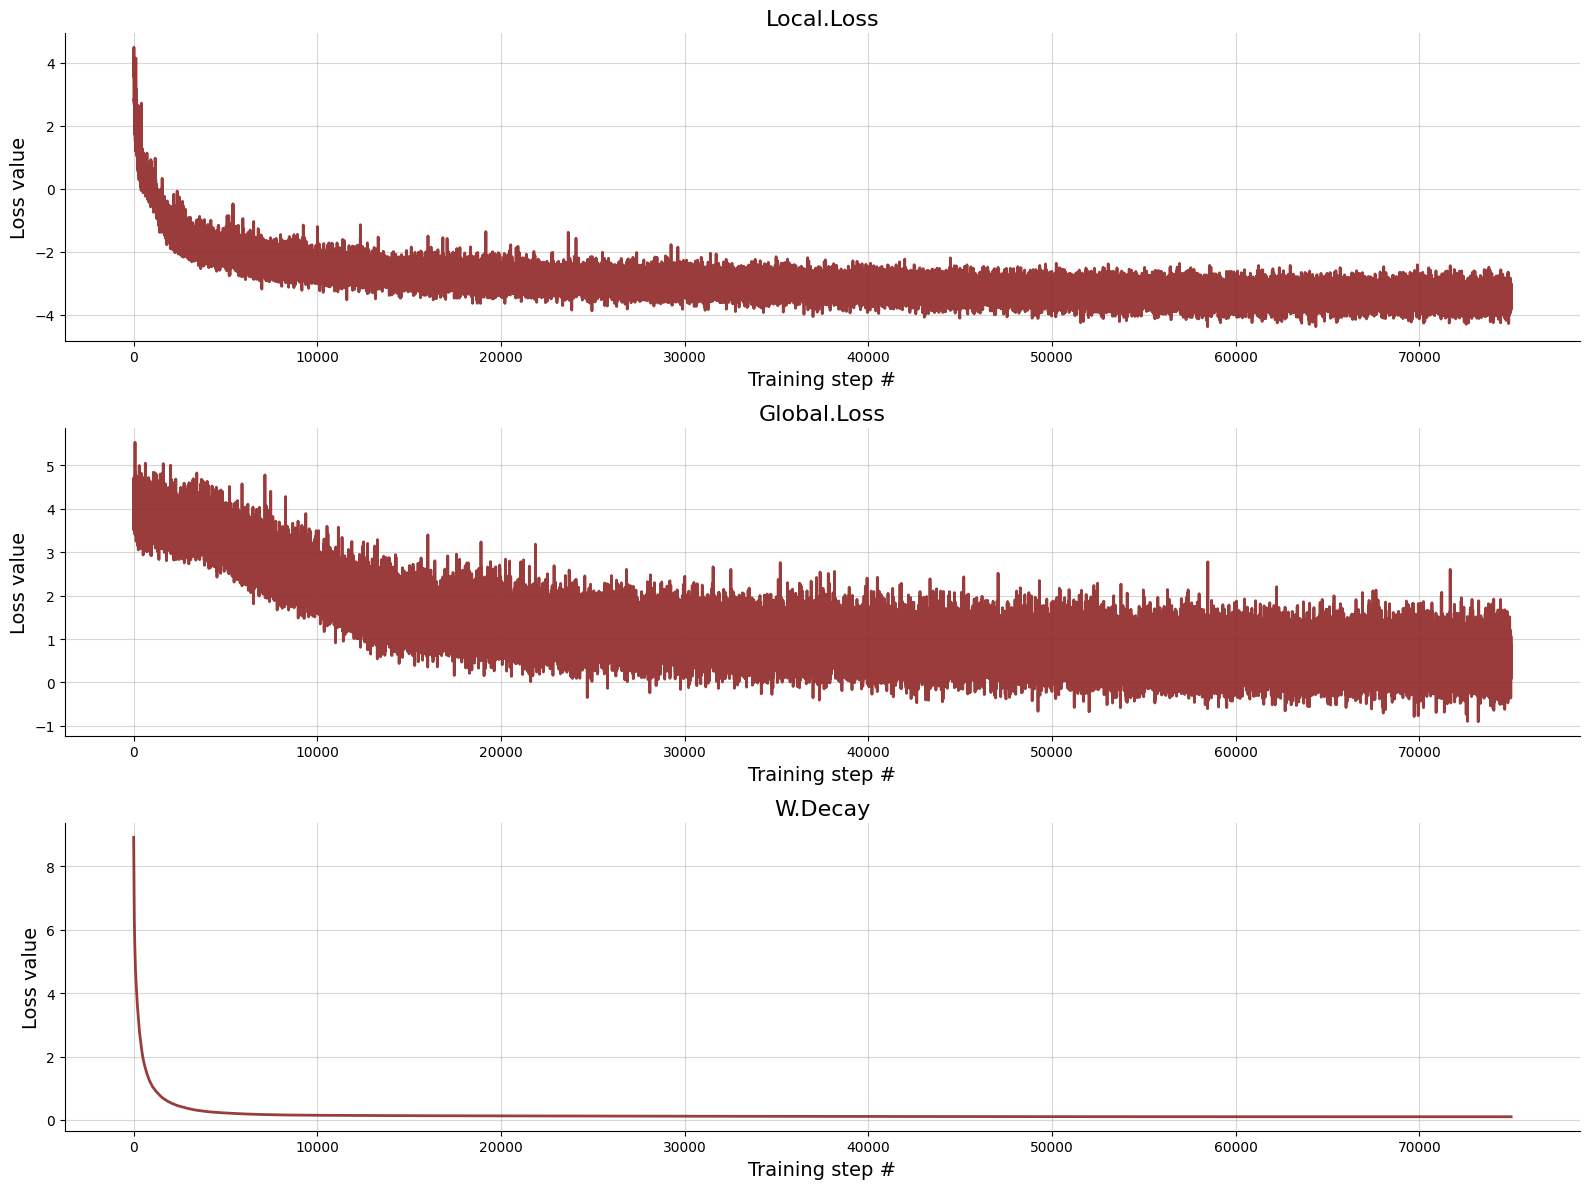

In [6]:
f = beef.diagnostics.plot_losses(random_walk_history)

In [7]:
%%time
if TRAIN_MIXTURE_RANDOM_WALK_DDM:
    mixture_random_walk_history = mixture_random_walk_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    mixture_random_walk_history = mixture_random_walk_experiment.trainer.loss_history.get_plottable()

CPU times: user 58.1 ms, sys: 172 µs, total: 58.2 ms
Wall time: 56.6 ms


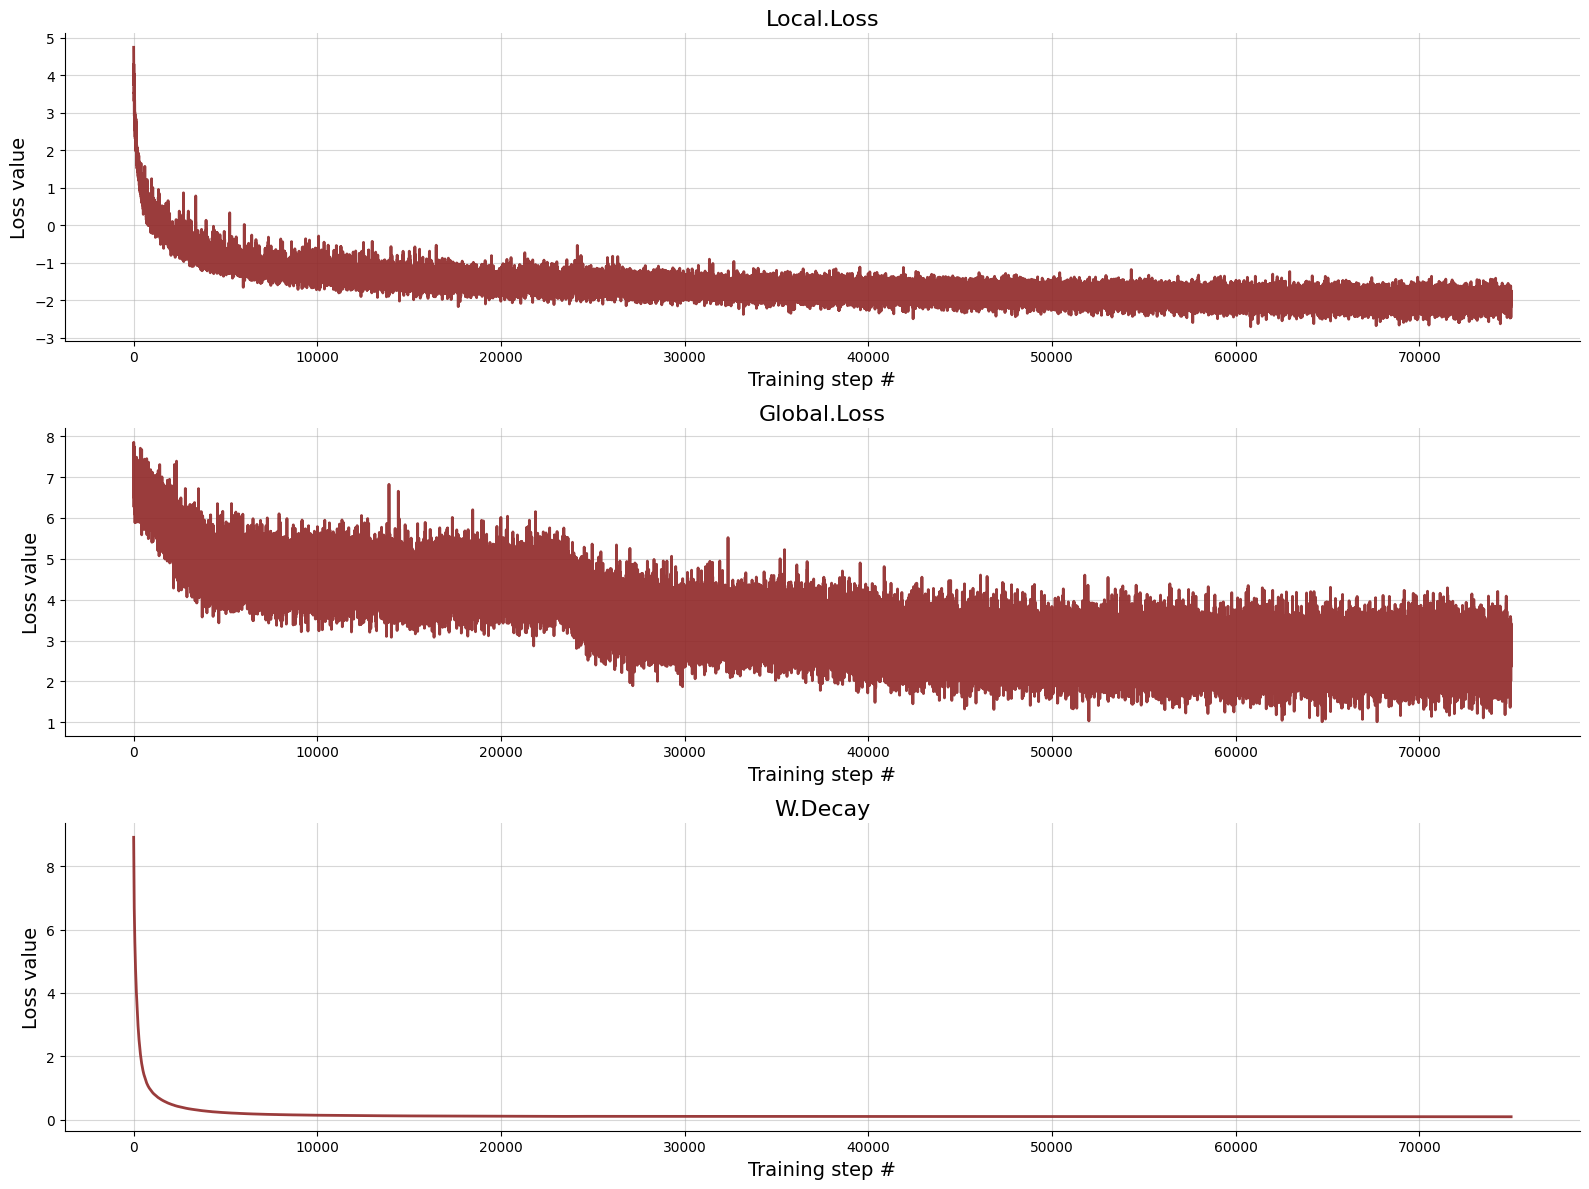

In [8]:
f = beef.diagnostics.plot_losses(mixture_random_walk_history)

In [9]:
%%time
if TRAIN_LEVY_FLIGHT_DDM:
    levy_flight_history = levy_flight_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    levy_flight_history = levy_flight_experiment.trainer.loss_history.get_plottable()

CPU times: user 67.3 ms, sys: 0 ns, total: 67.3 ms
Wall time: 65.5 ms


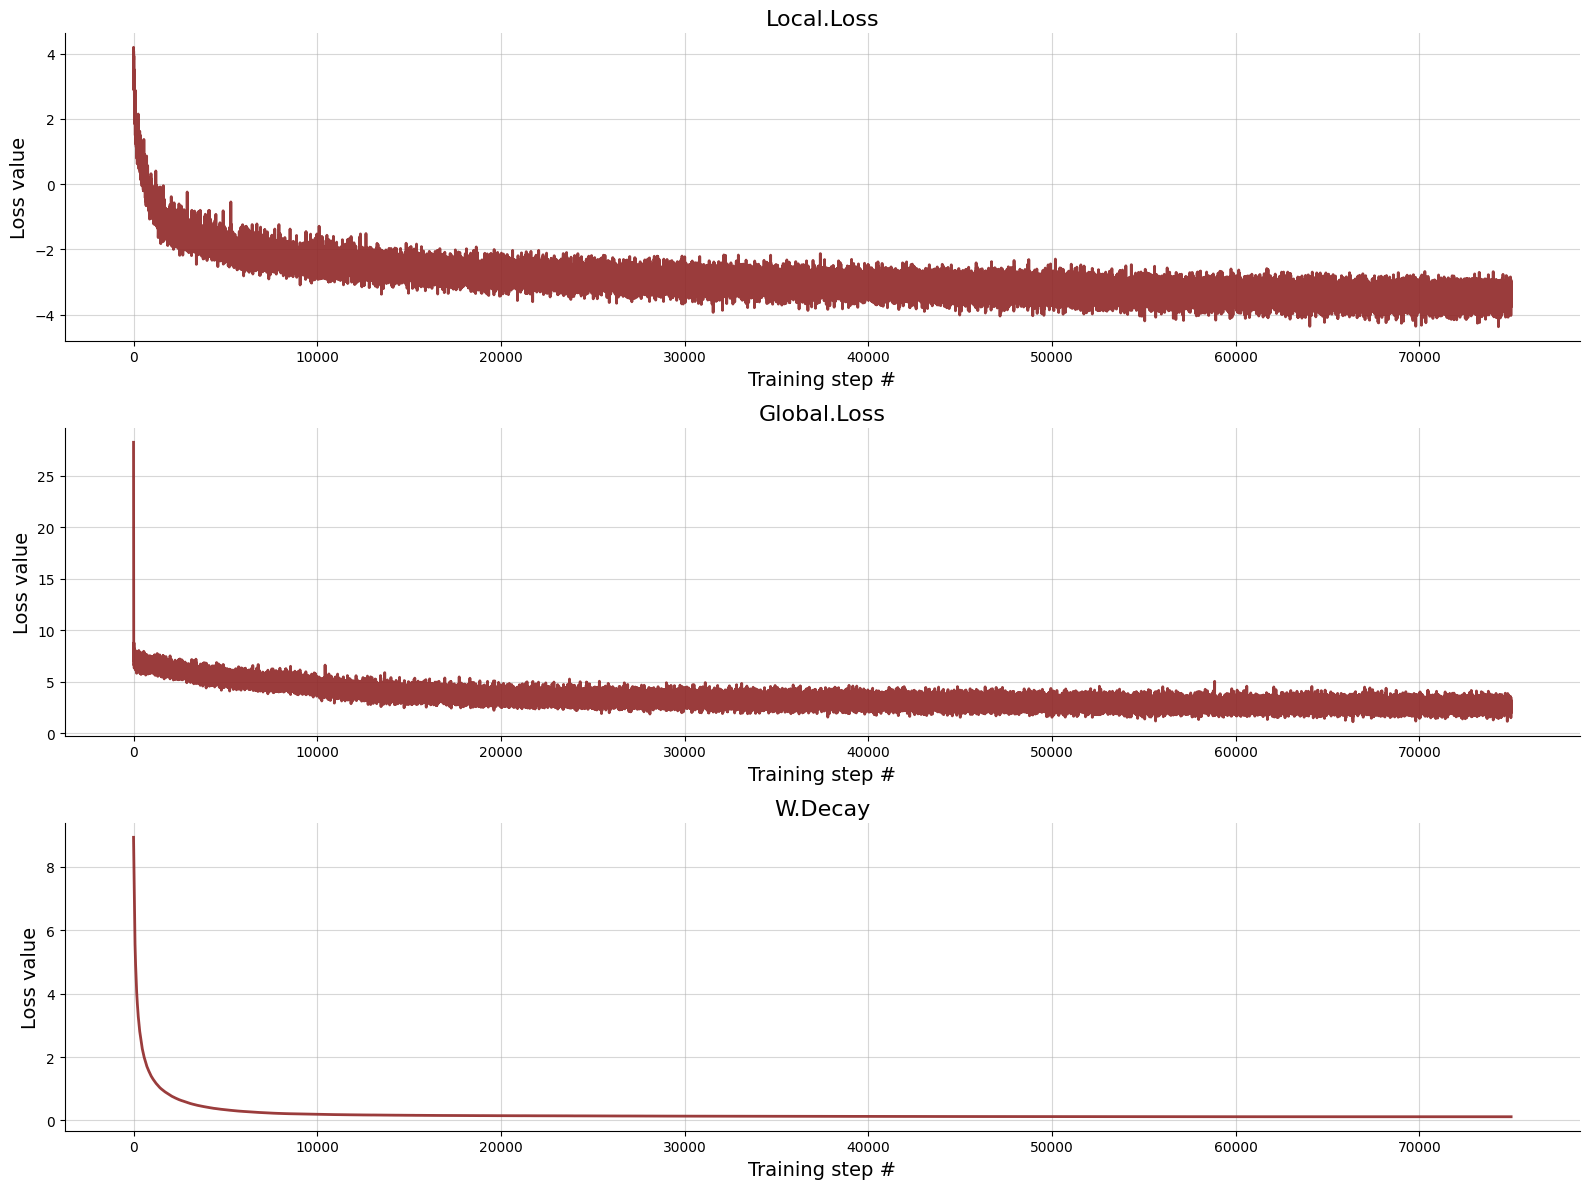

In [10]:
f = beef.diagnostics.plot_losses(levy_flight_history)

In [11]:
%%time
if TRAIN_REGIME_SWITCHING_DDM:
    regime_switching_history = regime_switching_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    regime_switching_history = regime_switching_experiment.trainer.loss_history.get_plottable()

CPU times: user 68.1 ms, sys: 0 ns, total: 68.1 ms
Wall time: 66 ms


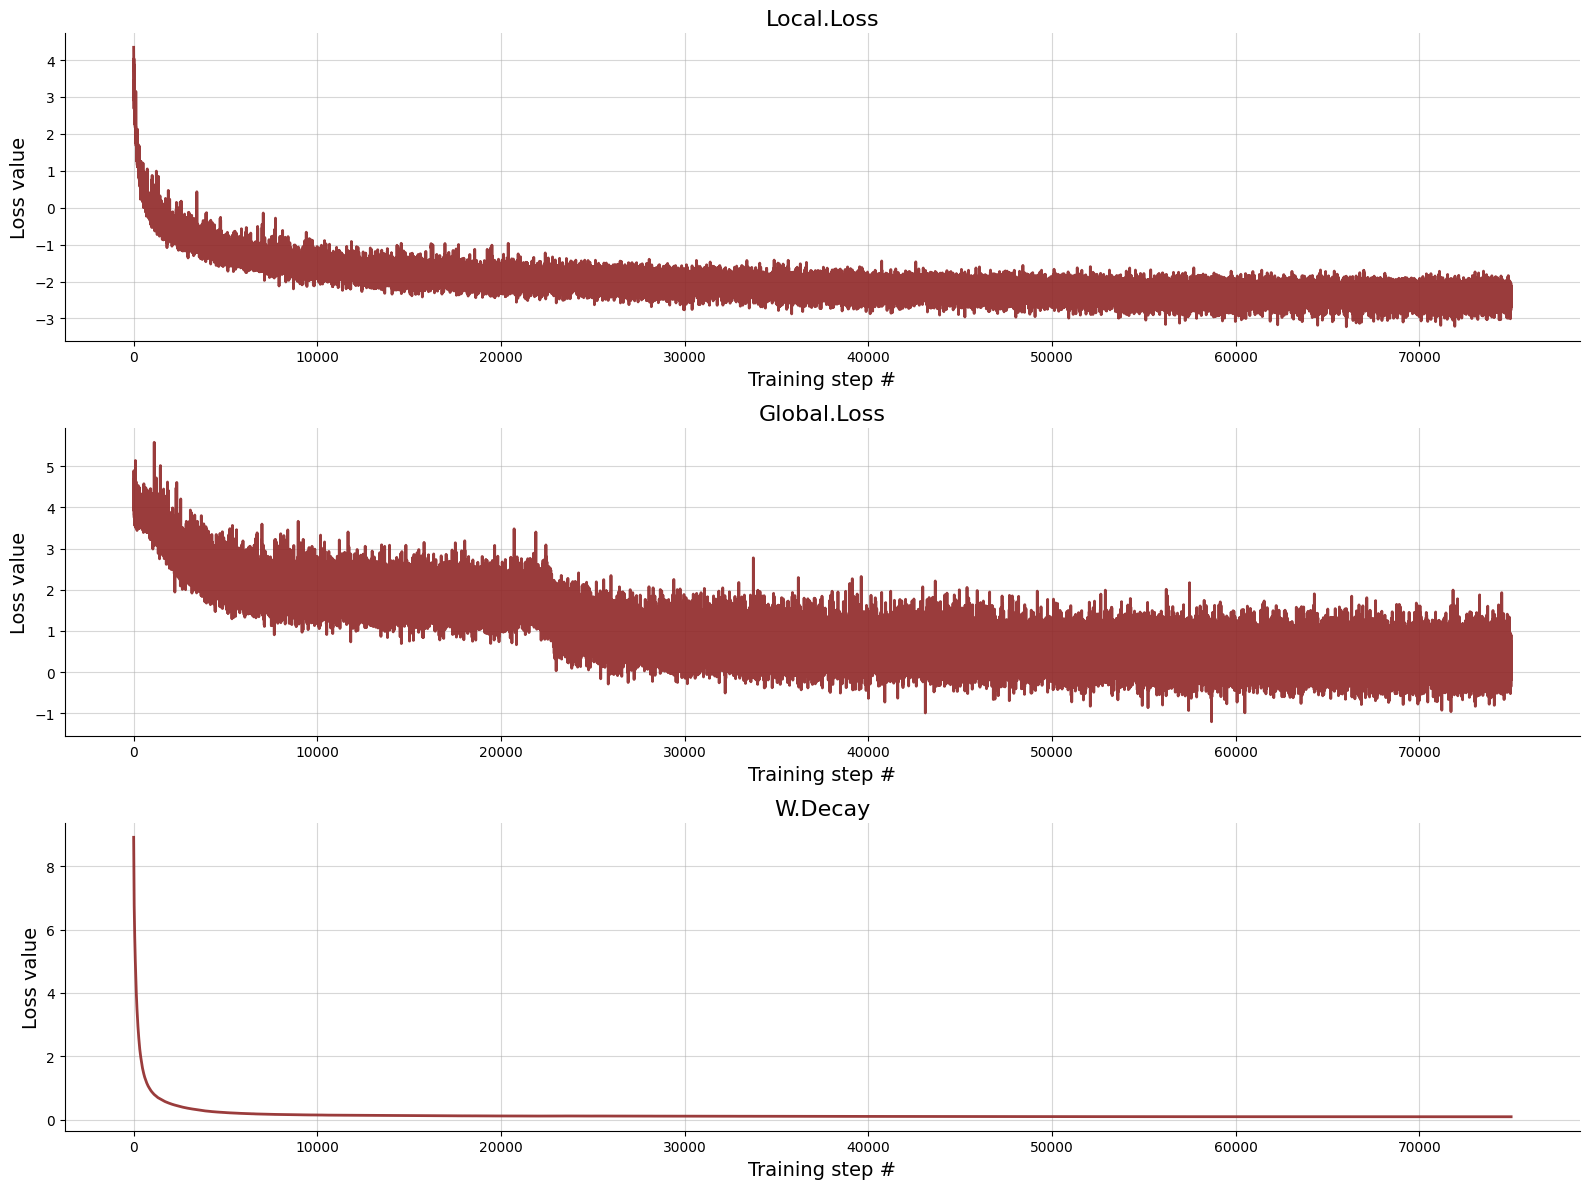

In [12]:
f = beef.diagnostics.plot_losses(regime_switching_history)